In [5]:
import pandas as pd

# 1. Define archivo CSV
ruta_del_archivo = '../data_raw/aireacond.csv' 

# 2. Carga el archivo en un DataFrame
# (Intenta primero sin 'skiprows', a ver qué sale)
df = pd.read_csv(ruta_del_archivo)

# 3. Muestra las primeras 5 filas para inspeccionar
df.head()

,folio,foliohog,id_aire,aire_tipo,aire_otro,aire_capa,aire_dia,aire_ene,aire_feb,aire_mar,...,aire_jul,aire_ago,aire_sep,aire_oct,aire_nov,aire_dic,aire_hor,aire_min,aire_adqui,aire_anio
0,69,1,1,4,,9,42,,,,...,,,,,,,6,0,1,2
1,69,1,2,4,,9,42,,,,...,,,,,,,3,0,1,2
2,70,1,2,6,,9,30,,,,...,,,,,,,2,0,1,1
3,70,1,1,6,,9,90,,,,...,,,,,,,4,0,1,1
4,76,1,1,2,,9,60,,,,...,,,,,,,2,0,1,8


In [3]:
print(df.columns)

Index(['folio', 'foliohog', 'id_aire', 'aire_tipo', 'aire_otro', 'aire_capa',
       'aire_dia', 'aire_ene', 'aire_feb', 'aire_mar', 'aire_abr', 'aire_may',
       'aire_jun', 'aire_jul', 'aire_ago', 'aire_sep', 'aire_oct', 'aire_nov',
       'aire_dic', 'aire_hor', 'aire_min', 'aire_adqui', 'aire_anio'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7567 entries, 0 to 7566
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   folio       7567 non-null   int64 
 1   foliohog    7567 non-null   int64 
 2   id_aire     7567 non-null   int64 
 3   aire_tipo   7567 non-null   int64 
 4   aire_otro   7567 non-null   object
 5   aire_capa   7567 non-null   int64 
 6   aire_dia    7567 non-null   int64 
 7   aire_ene    7567 non-null   object
 8   aire_feb    7567 non-null   object
 9   aire_mar    7567 non-null   object
 10  aire_abr    7567 non-null   object
 11  aire_may    7567 non-null   object
 12  aire_jun    7567 non-null   object
 13  aire_jul    7567 non-null   object
 14  aire_ago    7567 non-null   object
 15  aire_sep    7567 non-null   object
 16  aire_oct    7567 non-null   object
 17  aire_nov    7567 non-null   object
 18  aire_dic    7567 non-null   object
 19  aire_hor    7567 non-null   int64 
 20  aire_min

In [8]:
# Primero, crea una lista con todas las columnas de meses
columnas_meses = ['aire_ene', 'aire_feb', 'aire_mar', 'aire_abr', 'aire_may', 
                  'aire_jun', 'aire_jul', 'aire_ago', 'aire_sep', 'aire_oct', 
                  'aire_nov', 'aire_dic']

# Ahora, itera por cada columna, reemplaza el valor 'raro' por 0 y convierte a número
for col in columnas_meses:
    # Reemplaza el valor o valores raros que encontraste (ej. '&') por un 0
    # Puedes añadir más cosas al diccionario si encuentras más, ej. {'&': 0, ' ': 0}
    df[col] = df[col].replace({'&': 0}) 
    
    # Forzamos la columna a que sea de tipo numérico
    # errors='coerce' es un truco: si algo no se puede convertir, lo pone como Nulo (NaN)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Por si acaso, rellenamos cualquier Nulo que haya quedado con 0
    df[col] = df[col].fillna(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7567 entries, 0 to 7566
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folio       7567 non-null   int64  
 1   foliohog    7567 non-null   int64  
 2   id_aire     7567 non-null   int64  
 3   aire_tipo   7567 non-null   int64  
 4   aire_otro   7567 non-null   object 
 5   aire_capa   7567 non-null   int64  
 6   aire_dia    7567 non-null   int64  
 7   aire_ene    7567 non-null   float64
 8   aire_feb    7567 non-null   float64
 9   aire_mar    7567 non-null   float64
 10  aire_abr    7567 non-null   float64
 11  aire_may    7567 non-null   float64
 12  aire_jun    7567 non-null   float64
 13  aire_jul    7567 non-null   float64
 14  aire_ago    7567 non-null   float64
 15  aire_sep    7567 non-null   float64
 16  aire_oct    7567 non-null   float64
 17  aire_nov    7567 non-null   float64
 18  aire_dic    7567 non-null   float64
 19  aire_hor    7567 non-null  

In [ ]:
# Calcular el promedio de días y horas del año
promedio_dias_uso = df['aire_dia'].mean()
promedio_horas_uso = df['aire_hor'].mean()

print(f"En promedio, los hogares con A/C lo usan {promedio_dias_uso:.1f} días al mes.")
print(f"Y cuando lo usan, lo tienen encendido un promedio de {promedio_horas_uso:.1f} horas.")

En promedio, los hogares con A/C lo usan 171.7 días al mes.
Y cuando lo usan, lo tienen encendido un promedio de 7.3 horas.


Total de hogares que reportaron uso de A/C por mes:
aire_ene      773.0
aire_feb     2158.0
aire_mar     5967.0
aire_abr    13712.0
aire_may    30005.0
aire_jun    40602.0
aire_jul    48384.0
aire_ago    53632.0
aire_sep    47880.0
aire_oct    33900.0
aire_nov    15686.0
aire_dic     9192.0
dtype: float64


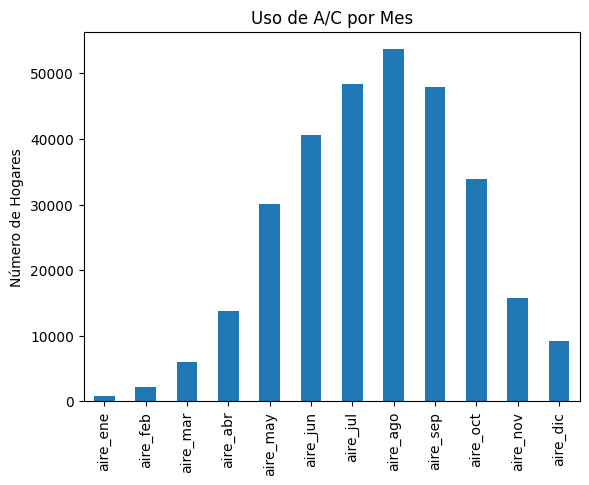

In [12]:
# Lista de las columnas de meses que ya estan limpias
columnas_meses = ['aire_ene', 'aire_feb', 'aire_mar', 'aire_abr', 'aire_may', 
                  'aire_jun', 'aire_jul', 'aire_ago', 'aire_sep', 'aire_oct', 
                  'aire_nov', 'aire_dic']

# Suma de hogares que usan A/C en cada mes
uso_por_mes = df[columnas_meses].sum()

print("Total de hogares que reportaron uso de A/C por mes:")
print(uso_por_mes)

# Verlo como un gráfico de barras
import matplotlib.pyplot as plt
uso_por_mes.plot(kind='bar')
plt.title('Uso de A/C por Mes')
plt.ylabel('Número de Hogares')
plt.show()

In [13]:
print("Valores únicos en 'aire_otro':")
print(df['aire_otro'].unique())

Valores únicos en 'aire_otro':
[' ' 'COOLER' 'AIRE LAVADO' 'AEROCOOLERS' 'AEROCOLER' 'AIRE COOLER'
 'AERO COOLER' 'AEROCOOLER' 'APARATO DE AGUA' 'HEROCOOLERS'
 'EL EQUIPO ES DE AIRE LAVADO AEROCOOLER' 'AIRE COOLERS'
 'EL EQUIPO CON EL QUE CUENTAN ES UN APARATO DE AIRE'
 'EQUIPO DE AIRE LAVADO' 'EQUIPO AEROCOOLERS' 'AIRE LAVADO COOLERS'
 'ES AIRE LAVADO' 'AEROCULERS'
 'MULTI SPLIT  ES UN SOLO APARTO QUE ABASTECE DOS RE' 'MINISPLIT INVERTER'
 'AEROCOOLER NO SABE CAPACIDAD' 'COOLERS' 'CENTRAL']
